In [5]:
from ChargeAPI.API_infrastructure.charge_request import module_version
from rdkit.Chem import rdmolfiles
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
import json
from rdkit.Chem import Draw, rdMolAlign


In [2]:
supplier = Chem.SDMolSupplier("./optimised_molecules.sdf",removeHs=False)


In [6]:
images = []
for i, mol in enumerate(supplier):
    mol_block = rdmolfiles.MolToMolBlock(mol)
    charge_result = module_version.handle_charge_request(conformer_mol=mol_block,
                                                         charge_model='MBIS_WB_GAS_CHARGE_DIPOLE')
    charges = json.loads(charge_result['charge_result'])
    AllChem.Compute2DCoords(mol)
    for i, atom in enumerate(mol.GetAtoms()):
        lbl = '%.3f' % (charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(mol)
img = Draw.MolsToGridImage(images, subImgSize=(400, 400), returnPNG=False)


ligand mode
ligand mode
ligand mode
ligand mode
ligand mode
ligand mode
ligand mode
ligand mode


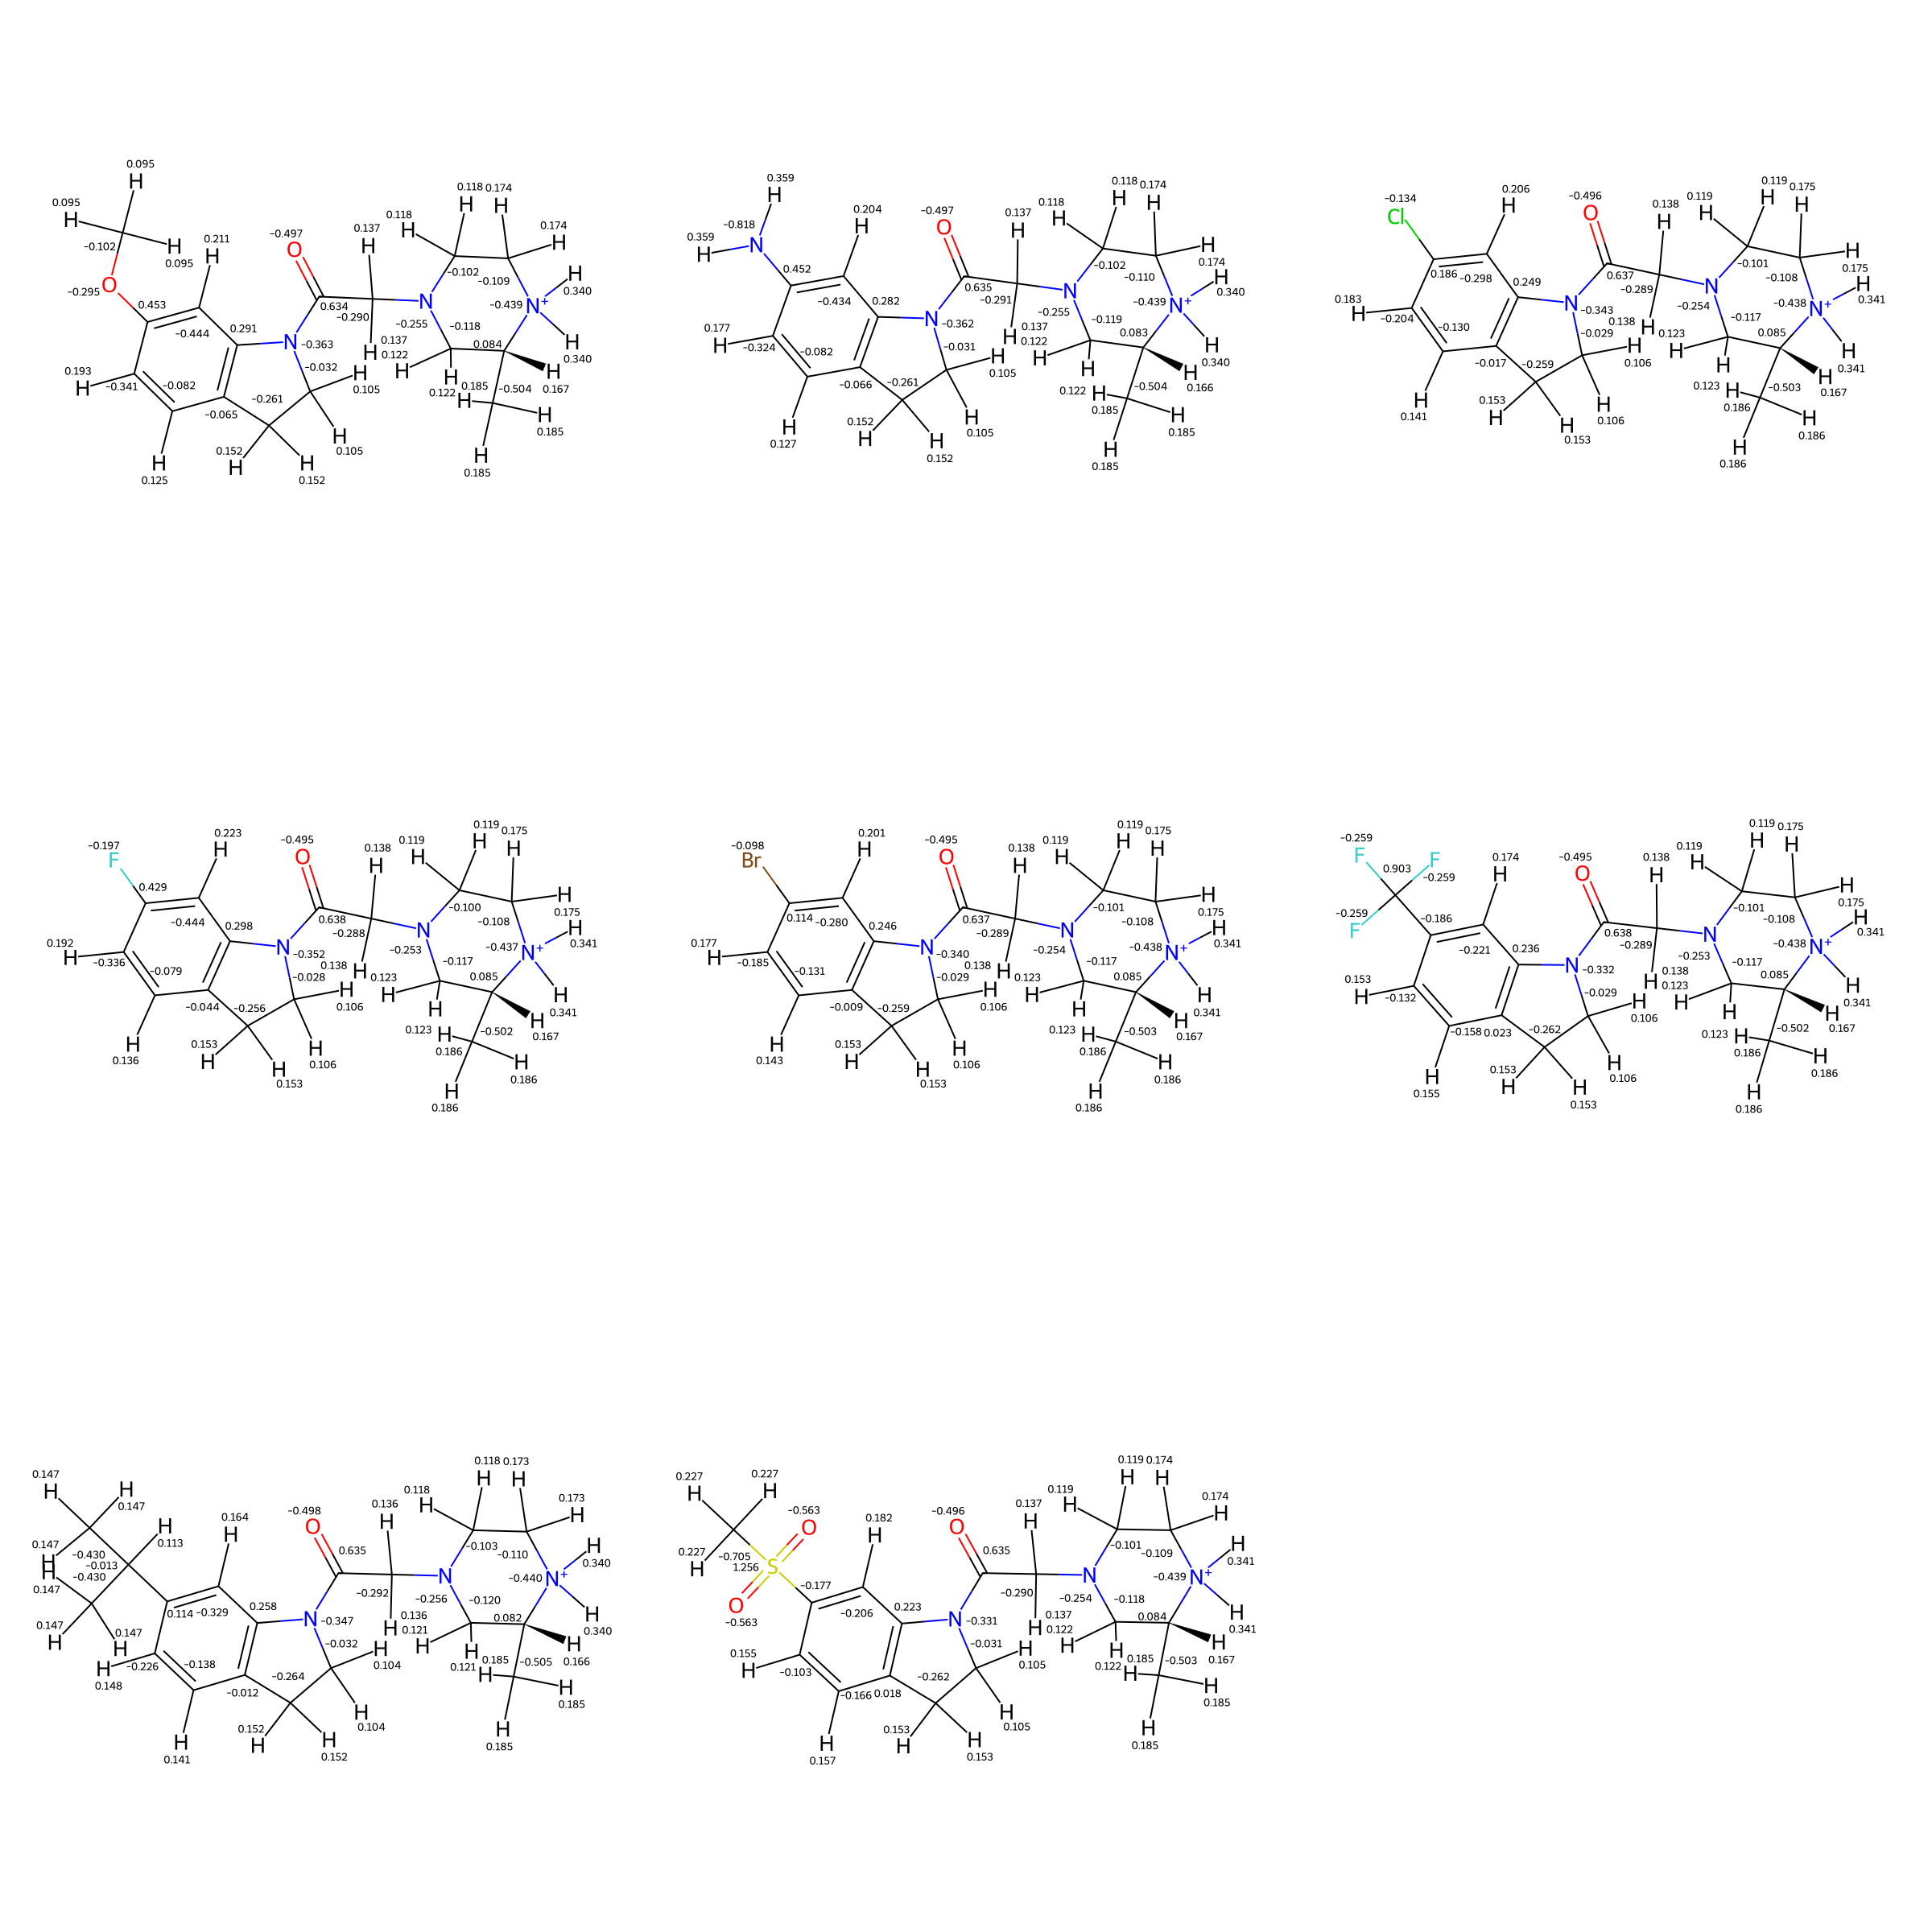

In [7]:
img = Draw.MolsToGridImage(images, subImgSize=(800, 800), returnPNG=False)
img

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


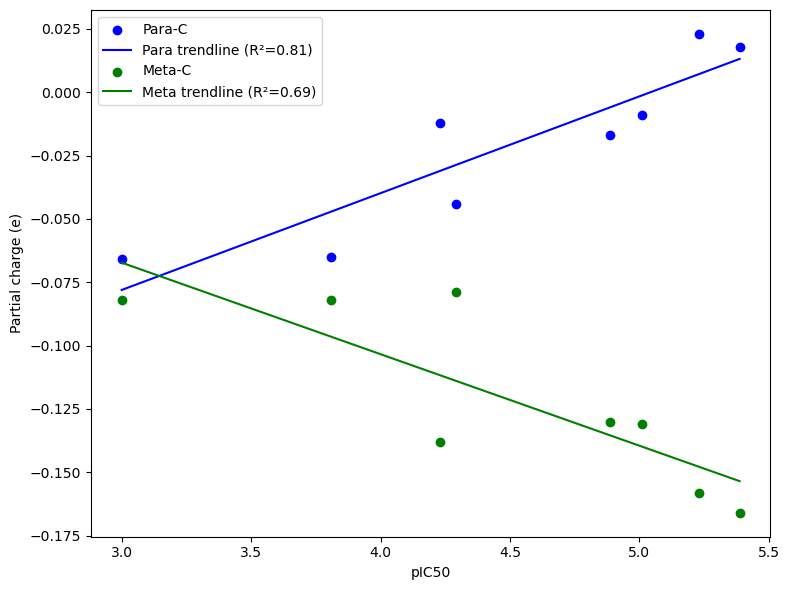

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

data = pd.read_csv('MedChem Results - Xiap.csv')

plt.figure(figsize=(8, 6))

# Para-C trendline
x_para = data['pIC50']
y_para = data['Para-C']
slope_p, intercept_p, r_value_p, _, _ = linregress(x_para, y_para)
plt.scatter(x_para, y_para, color='blue', label='Para-C')
plt.plot(np.sort(x_para), slope_p * np.sort(x_para) + intercept_p,
         linestyle='-', color='blue',
         label=f'Para trendline (R²={r_value_p**2:.2f})')

# Meta-C trendline
x_meta = data['pIC50']
y_meta = data['Meta-C']
slope_m, intercept_m, r_value_m, _, _ = linregress(x_meta, y_meta)
plt.scatter(x_meta, y_meta, color='green', label='Meta-C')
plt.plot(np.sort(x_meta), slope_m * np.sort(x_meta) + intercept_m,
         linestyle='-', color='green',
         label=f'Meta trendline (R²={r_value_m**2:.2f})')

# Labels and formatting
plt.xlabel('pIC50')
plt.ylabel('Partial charge (e)')
plt.legend()
plt.tight_layout()
plt.savefig('xiap charge plot.png', dpi=300)
plt.show()